<a href="https://colab.research.google.com/github/404himel/CNN/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d kshitij192/cars-image-dataset

Dataset URL: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset
License(s): GPL-2.0
 99% 36.0M/36.3M [00:04<00:00, 14.7MB/s]
100% 36.3M/36.3M [00:04<00:00, 9.37MB/s]


In [4]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cars-image-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/Cars Dataset/train',
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(224, 224),

)
valid_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/Cars Dataset/test',
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(224, 224),

)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from glob import glob

input_shape = (224, 224, 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Set base_model layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=valid_ds
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 372ms/step - accuracy: 0.5053 - loss: 19.7912 - val_accuracy: 0.8462 - val_loss: 0.7072
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9507 - loss: 0.1775 - val_accuracy: 0.9102 - val_loss: 0.3652
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9873 - loss: 0.0364 - val_accuracy: 0.8991 - val_loss: 0.4111
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9964 - loss: 0.0087 - val_accuracy: 0.9053 - val_loss: 0.4315
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9981 - loss: 0.0060 - val_accuracy: 0.9139 - val_loss: 0.3903
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9151 - val_loss: 0.3891
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 1.0000 - loss: 3.6413e-04 - val_accuracy: 0.9176 - val_loss: 0.3840
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 1.0000 - loss: 2.5101e-04 - val_accura

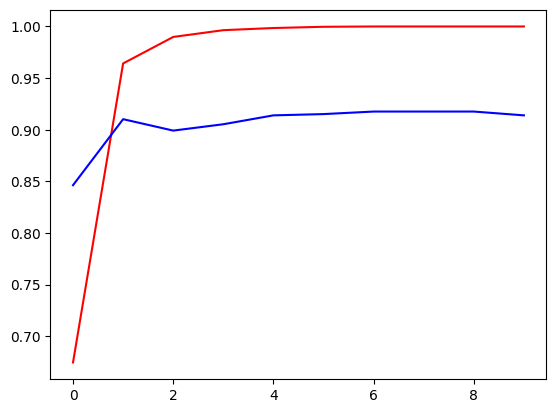

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train') # label was misspelled as lable
plt.plot(history.history['val_accuracy'],color='blue',label='validation') #Corrected the typo here as well and fixed another typo: histroy -> history
plt.show()

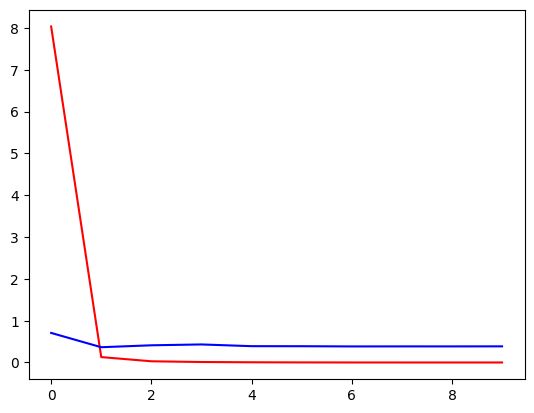

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train') # label was misspelled as lable
plt.plot(history.history['val_loss'],color='blue',label='validation') #Corrected the typo here as well and fixed another typo: histroy -> history
plt.show()

In [24]:
model.evaluate(valid_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9106 - loss: 0.4375


[0.385957807302475, 0.9138991236686707]

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # Import the preprocess_input function

img_path = '/content/audi_1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)

# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class index: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class index: [0]


In [28]:
img_path = '/content/bmw_1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)

# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class index: [0]


In [29]:
img_path = '/content/toyota_1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)

# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class index: [6]


In [30]:

img_path = '/content/Cars Dataset/test/Rolls Royce/101.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)

# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class index: [3]
